In [1]:
import numpy as np
from sklearn import svm
from sklearn import metrics
import time

import pandas as pd
import pathlib
import os
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/w2vecscaled.csv')
data.head()

,f_title1,f_title2,f_title3,f_title4,f_title5,f_title6,f_title7,f_title8,f_title9,f_title10,...,f_title294,f_title295,f_title296,f_title297,f_title298,f_title299,f_title300,upvotes,num_comments,lean
0,0.509233,0.509796,0.526944,0.317724,0.541685,0.531365,0.546596,0.569515,0.399459,0.430380,...,0.458434,0.437497,0.547845,0.622242,0.595791,0.422935,0.378929,0.000040,0.000000,0
1,0.545879,0.545836,0.542127,0.323522,0.588526,0.540965,0.494582,0.568003,0.447108,0.432901,...,0.463378,0.501334,0.446170,0.600539,0.577891,0.405029,0.332789,0.000239,0.000465,0
2,0.499863,0.491109,0.515401,0.301330,0.569805,0.482679,0.512302,0.536101,0.444994,0.450646,...,0.455791,0.461990,0.517195,0.584180,0.540460,0.405730,0.345539,0.000040,0.000465,0
3,0.592292,0.537038,0.506695,0.351282,0.606270,0.550121,0.499110,0.586974,0.414952,0.455848,...,0.410393,0.450405,0.593501,0.608552,0.564881,0.445488,0.306981,0.000279,0.001395,0
4,0.527448,0.455749,0.424801,0.041910,1.000000,0.574911,0.489282,0.557381,0.000000,0.683473,...,0.022727,0.439727,0.882757,0.609180,0.681899,0.175810,0.601163,0.000239,0.000465,0


In [3]:
print("Number of entries for Liberal: ", len(data[data.lean == 0]))
print("Number of entries for Conservative: ", len(data[data.lean == 1]))

Number of entries for Liberal:  8319
Number of entries for Conservative:  4535


In [4]:
X = data.values[:, :-1]
Y = data.values[:, -1]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print("Number of entries for Liberal: in Test", len([a for a in y_test if a == 0]))
print("Number of entries for Conservative: in Test ", len([a for a in y_test if a == 1]))

print("Number of entries for Liberal: in Train", len([a for a in y_train if a == 0]))
print("Number of entries for Conservative: in Train ", len([a for a in y_train if a == 1]))

Number of entries for Liberal: in Test 2074
Number of entries for Conservative: in Test  1140
Number of entries for Liberal: in Train 6245
Number of entries for Conservative: in Train  3395


In [6]:
def run_svm(kernel, X_trn, Y_trn, X_tst, Y_tst):
    model = svm.SVC(kernel=kernel)
    model.fit(X_trn, np.ravel(Y_trn))

    Y_prd = model.predict(X_tst)


    print('Accuracy for the training data: ' + str(
        round((model.score(X_trn, Y_trn) * 100), 2)) + ' %')

    acc_score = round((metrics.accuracy_score(Y_tst, Y_prd) * 100), 2)
    print('Accuracy for the test data: ' + str(acc_score) + ' %')

    cf_matrix = metrics.confusion_matrix(Y_tst, Y_prd)

    acc_score_liberal = round(((cf_matrix[0][0] / len([a for a in Y_tst if a == 0])) * 100), 2)
    print("Accuracy for class liberal: " , str(acc_score_liberal) , " %")

    acc_score_cons = round(((cf_matrix[1][1] / len([a for a in Y_tst if a == 1])) * 100), 2)
    print("Accuracy for class Conservative: " , str(acc_score_cons) , " %")

    return cf_matrix

In [7]:
start = time.time()
cf_matrix = run_svm('poly', x_train, y_train, x_test, y_test)
end = time.time()
print("\nTime taken: " + str(end - start))

Accuracy for the training data: 87.22 %
Accuracy for the test data: 73.8 %
Accuracy for class liberal:  87.03  %
Accuracy for class Conservative:  49.74  %

Time taken: 116.98140406608582


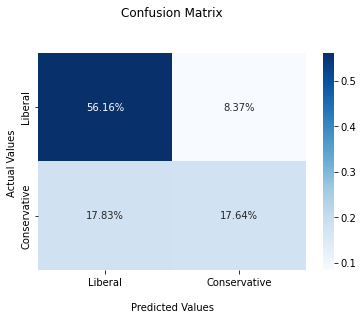

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Liberal','Conservative'])
ax.yaxis.set_ticklabels(['Liberal','Conservative'])

## Display the visualization of the Confusion Matrix.
plt.show()